# EC5027: ASSIGNMENT - 2

## HEART DISEASE PREDICTION 
<br> Submitted by : Gokul G

Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Loading & Preprocessing dataset

In [2]:
data = pd.read_csv("heart_data.csv")

In [4]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,typical,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2,reversable,1
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0,normal,0


In [11]:
(data.isnull()).sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           0
Thal         0
Target       0
dtype: int64

In [10]:
data = data.dropna()

In [18]:
data['Thal'] , Thal_index = pd.factorize(data['Thal'])
data['ChestPain'] , ChestPain_index = pd.factorize(data['ChestPain'])

In [19]:
data.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,Target
0,63,1,0,145,233,1,2,150,0,2.3,3,0,0,0
1,67,1,1,160,286,0,2,108,1,1.5,2,3,1,1
2,67,1,1,120,229,0,2,129,1,2.6,2,2,2,1
3,37,1,2,130,250,0,0,187,0,3.5,3,0,1,0
4,41,0,3,130,204,0,2,172,0,1.4,1,0,1,0


In [33]:
Y = data.iloc[:,-1]
X = data.iloc[:,0:-1]

In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
print("Training Accuracy: ",lr.score(x_train,y_train))
print("Testing Accuracy: ",lr.score(x_test,y_test))

Training Accuracy:  0.8333333333333334
Testing Accuracy:  0.8688524590163934


C:\Users\Vasumathi T\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVM

In [48]:
from sklearn.svm import LinearSVC
sv= LinearSVC()
sv.fit(x_train,y_train)
print("Training Accuracy: ",sv.score(x_train,y_train))
print("Testing Accuracy: ",sv.score(x_test,y_test))

Training Accuracy:  0.7666666666666667
Testing Accuracy:  0.819672131147541


C:\Users\Vasumathi T\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Decision Tree

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)
print("Training Accuracy: ",dt.score(x_train,y_train))
print("Testing Accuracy: ",dt.score(x_test,y_test))

Training Accuracy:  0.8875
Testing Accuracy:  0.7540983606557377


Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
print("Training Accuracy: ",rfc.score(x_train,y_train))
print("Testing Accuracy: ",rfc.score(x_test,y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.8688524590163934


K-nearest neighbours classification

In [76]:
from sklearn.neighbors import KNeighborsClassifier
kn= KNeighborsClassifier(8)
kn.fit(x_train,y_train)
print("Training Accuracy: ",kn.score(x_train,y_train))
print("Testing Accuracy: ",kn.score(x_test,y_test))

Training Accuracy:  0.7
Testing Accuracy:  0.7213114754098361


Neural Networks

In [95]:
import tensorflow as tf
import tensorflow.keras.layers as tfl

model = tf.keras.models.Sequential([
            tf.keras.Input(shape=(13)),
            tf.keras.layers.Dense(units=1024, activation='relu'),
            tf.keras.layers.Dropout(0.4),
            tf.keras.layers.Dense(units=1, activation='sigmoid')
          ])
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                loss='binary_crossentropy',
                metrics=['accuracy'])

C:\Users\Vasumathi T\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [96]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1024)              14336     
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 15,361
Trainable params: 15,361
Non-trainable params: 0
_________________________________________________________________


In [100]:
 history = model.fit(x_train, y_train, epochs=2000, validation_data=(x_test, y_test))

Epoch 1/2000
8/8 [==============================] - 1s 134ms/step - loss: 0.3247 - accuracy: 0.8500 - val_loss: 0.3146 - val_accuracy: 0.8361
Epoch 2/2000
8/8 [==============================] - 0s 28ms/step - loss: 0.3340 - accuracy: 0.8333 - val_loss: 0.3138 - val_accuracy: 0.8197
Epoch 3/2000
8/8 [==============================] - 0s 27ms/step - loss: 0.3288 - accuracy: 0.8333 - val_loss: 0.3175 - val_accuracy: 0.8361
Epoch 4/2000
8/8 [==============================] - 0s 26ms/step - loss: 0.3354 - accuracy: 0.8583 - val_loss: 0.3179 - val_accuracy: 0.8361
Epoch 5/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.3407 - accuracy: 0.8458 - val_loss: 0.3243 - val_accuracy: 0.8197
Epoch 6/2000
8/8 [==============================] - 0s 23ms/step - loss: 0.3159 - accuracy: 0.8625 - val_loss: 0.3181 - val_accuracy: 0.8197
Epoch 7/2000
8/8 [==============================] - 0s 22ms/step - loss: 0.3275 - accuracy: 0.8458 - val_loss: 0.3155 - val_accuracy: 0.8361
Epoch 8/2000

Epoch 59/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3190 - accuracy: 0.8500 - val_loss: 0.3267 - val_accuracy: 0.8197
Epoch 60/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.3224 - accuracy: 0.8625 - val_loss: 0.3224 - val_accuracy: 0.8361
Epoch 61/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3266 - accuracy: 0.8708 - val_loss: 0.3185 - val_accuracy: 0.8197
Epoch 62/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3299 - accuracy: 0.8625 - val_loss: 0.3135 - val_accuracy: 0.8361
Epoch 63/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.2932 - accuracy: 0.8542 - val_loss: 0.3130 - val_accuracy: 0.8197
Epoch 64/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3197 - accuracy: 0.8583 - val_loss: 0.3131 - val_accuracy: 0.8197
Epoch 65/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.3384 - accuracy: 0.8375 - val_loss: 0.3216 - val_accuracy: 0.8197
Epoch 

8/8 [==============================] - 0s 16ms/step - loss: 0.2896 - accuracy: 0.8792 - val_loss: 0.3209 - val_accuracy: 0.8033
Epoch 174/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3367 - accuracy: 0.8458 - val_loss: 0.3167 - val_accuracy: 0.8197
Epoch 175/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3397 - accuracy: 0.8500 - val_loss: 0.3147 - val_accuracy: 0.8197
Epoch 176/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3334 - accuracy: 0.8500 - val_loss: 0.3150 - val_accuracy: 0.8361
Epoch 177/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3113 - accuracy: 0.8583 - val_loss: 0.3213 - val_accuracy: 0.8033
Epoch 178/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3056 - accuracy: 0.8917 - val_loss: 0.3160 - val_accuracy: 0.8197
Epoch 179/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.3300 - accuracy: 0.8625 - val_loss: 0.3150 - val_accuracy: 0.8197
Epoch 180/2000

8/8 [==============================] - 0s 18ms/step - loss: 0.2917 - accuracy: 0.8708 - val_loss: 0.3247 - val_accuracy: 0.8197
Epoch 288/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2921 - accuracy: 0.8625 - val_loss: 0.3205 - val_accuracy: 0.8197
Epoch 289/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3161 - accuracy: 0.8625 - val_loss: 0.3169 - val_accuracy: 0.8197
Epoch 290/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3131 - accuracy: 0.8583 - val_loss: 0.3181 - val_accuracy: 0.8197
Epoch 291/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.3100 - accuracy: 0.8583 - val_loss: 0.3164 - val_accuracy: 0.8361
Epoch 292/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2831 - accuracy: 0.8750 - val_loss: 0.3162 - val_accuracy: 0.8197
Epoch 293/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.3178 - accuracy: 0.8542 - val_loss: 0.3166 - val_accuracy: 0.8197
Epoch 294/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.2952 - accuracy: 0.8542 - val_loss: 0.3080 - val_accuracy: 0.8361
Epoch 402/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2852 - accuracy: 0.8625 - val_loss: 0.3141 - val_accuracy: 0.8689
Epoch 403/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3052 - accuracy: 0.8250 - val_loss: 0.3084 - val_accuracy: 0.8361
Epoch 404/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2746 - accuracy: 0.8750 - val_loss: 0.3136 - val_accuracy: 0.8197
Epoch 405/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2839 - accuracy: 0.8708 - val_loss: 0.3131 - val_accuracy: 0.8033
Epoch 406/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.3116 - accuracy: 0.8500 - val_loss: 0.3091 - val_accuracy: 0.8197
Epoch 407/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.2744 - accuracy: 0.8750 - val_loss: 0.3077 - val_accuracy: 0.8525
Epoch 408/2000

8/8 [==============================] - 0s 13ms/step - loss: 0.2812 - accuracy: 0.8875 - val_loss: 0.3133 - val_accuracy: 0.8197
Epoch 516/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2831 - accuracy: 0.8792 - val_loss: 0.3143 - val_accuracy: 0.8361
Epoch 517/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2702 - accuracy: 0.8958 - val_loss: 0.3158 - val_accuracy: 0.8197
Epoch 518/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2769 - accuracy: 0.8833 - val_loss: 0.3127 - val_accuracy: 0.8361
Epoch 519/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2742 - accuracy: 0.8750 - val_loss: 0.3121 - val_accuracy: 0.8361
Epoch 520/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2654 - accuracy: 0.8917 - val_loss: 0.3137 - val_accuracy: 0.8197
Epoch 521/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2878 - accuracy: 0.8708 - val_loss: 0.3116 - val_accuracy: 0.8361
Epoch 522/2000

8/8 [==============================] - 0s 16ms/step - loss: 0.2687 - accuracy: 0.8833 - val_loss: 0.3166 - val_accuracy: 0.8525
Epoch 630/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2741 - accuracy: 0.8625 - val_loss: 0.3128 - val_accuracy: 0.8361
Epoch 631/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2776 - accuracy: 0.8792 - val_loss: 0.3084 - val_accuracy: 0.8361
Epoch 632/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2780 - accuracy: 0.8708 - val_loss: 0.3048 - val_accuracy: 0.8361
Epoch 633/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2799 - accuracy: 0.8875 - val_loss: 0.3104 - val_accuracy: 0.8197
Epoch 634/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2478 - accuracy: 0.8958 - val_loss: 0.3175 - val_accuracy: 0.8197
Epoch 635/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2735 - accuracy: 0.8667 - val_loss: 0.3151 - val_accuracy: 0.8197
Epoch 636/2000

8/8 [==============================] - 0s 16ms/step - loss: 0.2423 - accuracy: 0.8875 - val_loss: 0.3237 - val_accuracy: 0.8361
Epoch 744/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2487 - accuracy: 0.8958 - val_loss: 0.3204 - val_accuracy: 0.8197
Epoch 745/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2744 - accuracy: 0.8792 - val_loss: 0.3180 - val_accuracy: 0.8197
Epoch 746/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2581 - accuracy: 0.8875 - val_loss: 0.3141 - val_accuracy: 0.8033
Epoch 747/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2596 - accuracy: 0.8958 - val_loss: 0.3142 - val_accuracy: 0.8197
Epoch 748/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2642 - accuracy: 0.8833 - val_loss: 0.3097 - val_accuracy: 0.8197
Epoch 749/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2425 - accuracy: 0.8958 - val_loss: 0.3083 - val_accuracy: 0.8197
Epoch 750/2000

8/8 [==============================] - 0s 13ms/step - loss: 0.2381 - accuracy: 0.9042 - val_loss: 0.3171 - val_accuracy: 0.8361
Epoch 858/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2642 - accuracy: 0.8792 - val_loss: 0.3177 - val_accuracy: 0.8525
Epoch 859/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2496 - accuracy: 0.9167 - val_loss: 0.3167 - val_accuracy: 0.8361
Epoch 860/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2380 - accuracy: 0.9000 - val_loss: 0.3190 - val_accuracy: 0.8525
Epoch 861/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.2611 - accuracy: 0.8833 - val_loss: 0.3124 - val_accuracy: 0.8197
Epoch 862/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2564 - accuracy: 0.9042 - val_loss: 0.3186 - val_accuracy: 0.8197
Epoch 863/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2665 - accuracy: 0.8792 - val_loss: 0.3221 - val_accuracy: 0.8197
Epoch 864/2000

8/8 [==============================] - 0s 13ms/step - loss: 0.2249 - accuracy: 0.9125 - val_loss: 0.3267 - val_accuracy: 0.8033
Epoch 972/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2196 - accuracy: 0.9208 - val_loss: 0.3301 - val_accuracy: 0.8525
Epoch 973/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2345 - accuracy: 0.8917 - val_loss: 0.3320 - val_accuracy: 0.8525
Epoch 974/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2226 - accuracy: 0.9208 - val_loss: 0.3304 - val_accuracy: 0.8033
Epoch 975/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2235 - accuracy: 0.9042 - val_loss: 0.3226 - val_accuracy: 0.8033
Epoch 976/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2471 - accuracy: 0.8958 - val_loss: 0.3261 - val_accuracy: 0.8525
Epoch 977/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2442 - accuracy: 0.8958 - val_loss: 0.3249 - val_accuracy: 0.8361
Epoch 978/2000

8/8 [==============================] - 0s 14ms/step - loss: 0.2145 - accuracy: 0.9125 - val_loss: 0.3343 - val_accuracy: 0.8525
Epoch 1086/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2117 - accuracy: 0.9208 - val_loss: 0.3301 - val_accuracy: 0.8197
Epoch 1087/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2285 - accuracy: 0.9125 - val_loss: 0.3328 - val_accuracy: 0.8361
Epoch 1088/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2280 - accuracy: 0.9042 - val_loss: 0.3244 - val_accuracy: 0.8525
Epoch 1089/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2374 - accuracy: 0.8917 - val_loss: 0.3233 - val_accuracy: 0.8197
Epoch 1090/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2063 - accuracy: 0.9250 - val_loss: 0.3295 - val_accuracy: 0.8197
Epoch 1091/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2158 - accuracy: 0.9042 - val_loss: 0.3284 - val_accuracy: 0.8525
Epoch 10

8/8 [==============================] - 0s 13ms/step - loss: 0.2123 - accuracy: 0.9167 - val_loss: 0.3307 - val_accuracy: 0.8852
Epoch 1143/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2253 - accuracy: 0.9083 - val_loss: 0.3236 - val_accuracy: 0.8525
Epoch 1144/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2231 - accuracy: 0.9083 - val_loss: 0.3202 - val_accuracy: 0.8525
Epoch 1145/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2255 - accuracy: 0.9375 - val_loss: 0.3181 - val_accuracy: 0.8361
Epoch 1146/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2325 - accuracy: 0.9000 - val_loss: 0.3187 - val_accuracy: 0.8361
Epoch 1147/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2124 - accuracy: 0.9333 - val_loss: 0.3203 - val_accuracy: 0.8197
Epoch 1148/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.2568 - accuracy: 0.8917 - val_loss: 0.3211 - val_accuracy: 0.8361
Epoch 11

8/8 [==============================] - 0s 14ms/step - loss: 0.2096 - accuracy: 0.9208 - val_loss: 0.3238 - val_accuracy: 0.8525
Epoch 1200/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2335 - accuracy: 0.8917 - val_loss: 0.3242 - val_accuracy: 0.8525
Epoch 1201/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.2348 - accuracy: 0.9042 - val_loss: 0.3253 - val_accuracy: 0.8689
Epoch 1202/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.2202 - accuracy: 0.9167 - val_loss: 0.3258 - val_accuracy: 0.8525
Epoch 1203/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2146 - accuracy: 0.9125 - val_loss: 0.3331 - val_accuracy: 0.8361
Epoch 1204/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.2313 - accuracy: 0.9000 - val_loss: 0.3238 - val_accuracy: 0.8689
Epoch 1205/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2276 - accuracy: 0.8958 - val_loss: 0.3260 - val_accuracy: 0.8361
Epoch 12

8/8 [==============================] - 0s 13ms/step - loss: 0.2145 - accuracy: 0.9208 - val_loss: 0.3247 - val_accuracy: 0.8361
Epoch 1257/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2004 - accuracy: 0.9083 - val_loss: 0.3256 - val_accuracy: 0.8361
Epoch 1258/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2119 - accuracy: 0.9083 - val_loss: 0.3244 - val_accuracy: 0.8361
Epoch 1259/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2104 - accuracy: 0.9292 - val_loss: 0.3250 - val_accuracy: 0.8525
Epoch 1260/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2105 - accuracy: 0.9083 - val_loss: 0.3304 - val_accuracy: 0.8525
Epoch 1261/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2250 - accuracy: 0.8958 - val_loss: 0.3288 - val_accuracy: 0.8197
Epoch 1262/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2307 - accuracy: 0.8958 - val_loss: 0.3275 - val_accuracy: 0.8525
Epoch 12

8/8 [==============================] - 0s 16ms/step - loss: 0.2184 - accuracy: 0.9125 - val_loss: 0.3240 - val_accuracy: 0.8361
Epoch 1314/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2152 - accuracy: 0.8917 - val_loss: 0.3298 - val_accuracy: 0.8033
Epoch 1315/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2275 - accuracy: 0.8917 - val_loss: 0.3313 - val_accuracy: 0.8361
Epoch 1316/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2097 - accuracy: 0.9292 - val_loss: 0.3418 - val_accuracy: 0.8361
Epoch 1317/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2065 - accuracy: 0.9333 - val_loss: 0.3322 - val_accuracy: 0.8525
Epoch 1318/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1860 - accuracy: 0.9417 - val_loss: 0.3263 - val_accuracy: 0.8361
Epoch 1319/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2208 - accuracy: 0.9167 - val_loss: 0.3327 - val_accuracy: 0.8525
Epoch 13

8/8 [==============================] - 0s 16ms/step - loss: 0.1936 - accuracy: 0.9167 - val_loss: 0.3353 - val_accuracy: 0.8361
Epoch 1371/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2029 - accuracy: 0.9208 - val_loss: 0.3375 - val_accuracy: 0.8361
Epoch 1372/2000
8/8 [==============================] - 0s 11ms/step - loss: 0.2137 - accuracy: 0.9083 - val_loss: 0.3407 - val_accuracy: 0.8525
Epoch 1373/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1940 - accuracy: 0.9250 - val_loss: 0.3430 - val_accuracy: 0.8525
Epoch 1374/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.2030 - accuracy: 0.9208 - val_loss: 0.3444 - val_accuracy: 0.8361
Epoch 1375/2000
8/8 [==============================] - 0s 9ms/step - loss: 0.1995 - accuracy: 0.9292 - val_loss: 0.3464 - val_accuracy: 0.8525
Epoch 1376/2000
8/8 [==============================] - 0s 7ms/step - loss: 0.1925 - accuracy: 0.9250 - val_loss: 0.3437 - val_accuracy: 0.8361
Epoch 1377/2

8/8 [==============================] - 0s 16ms/step - loss: 0.2029 - accuracy: 0.9250 - val_loss: 0.3421 - val_accuracy: 0.8361
Epoch 1485/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1970 - accuracy: 0.9375 - val_loss: 0.3402 - val_accuracy: 0.8525
Epoch 1486/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.2231 - accuracy: 0.9000 - val_loss: 0.3459 - val_accuracy: 0.8361
Epoch 1487/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1909 - accuracy: 0.9292 - val_loss: 0.3351 - val_accuracy: 0.8525
Epoch 1488/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1780 - accuracy: 0.9292 - val_loss: 0.3293 - val_accuracy: 0.8689
Epoch 1489/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1936 - accuracy: 0.9250 - val_loss: 0.3402 - val_accuracy: 0.8361
Epoch 1490/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.2035 - accuracy: 0.9333 - val_loss: 0.3361 - val_accuracy: 0.8361
Epoch 14

8/8 [==============================] - 0s 19ms/step - loss: 0.1800 - accuracy: 0.9458 - val_loss: 0.3337 - val_accuracy: 0.8525
Epoch 1542/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1822 - accuracy: 0.9292 - val_loss: 0.3325 - val_accuracy: 0.8689
Epoch 1543/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.1670 - accuracy: 0.9583 - val_loss: 0.3376 - val_accuracy: 0.8689
Epoch 1544/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1753 - accuracy: 0.9250 - val_loss: 0.3371 - val_accuracy: 0.8361
Epoch 1545/2000
8/8 [==============================] - 0s 20ms/step - loss: 0.2039 - accuracy: 0.9083 - val_loss: 0.3340 - val_accuracy: 0.8852
Epoch 1546/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1781 - accuracy: 0.9417 - val_loss: 0.3353 - val_accuracy: 0.8525
Epoch 1547/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1847 - accuracy: 0.9292 - val_loss: 0.3476 - val_accuracy: 0.8361
Epoch 15

8/8 [==============================] - 0s 15ms/step - loss: 0.1655 - accuracy: 0.9375 - val_loss: 0.3291 - val_accuracy: 0.8689
Epoch 1599/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1938 - accuracy: 0.9167 - val_loss: 0.3283 - val_accuracy: 0.8525
Epoch 1600/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1793 - accuracy: 0.9375 - val_loss: 0.3332 - val_accuracy: 0.8361
Epoch 1601/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1975 - accuracy: 0.9458 - val_loss: 0.3327 - val_accuracy: 0.8689
Epoch 1602/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1787 - accuracy: 0.9333 - val_loss: 0.3311 - val_accuracy: 0.8689
Epoch 1603/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1910 - accuracy: 0.9375 - val_loss: 0.3354 - val_accuracy: 0.8361
Epoch 1604/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1991 - accuracy: 0.9292 - val_loss: 0.3500 - val_accuracy: 0.8361
Epoch 16

8/8 [==============================] - 0s 18ms/step - loss: 0.1569 - accuracy: 0.9458 - val_loss: 0.3410 - val_accuracy: 0.8361
Epoch 1656/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1934 - accuracy: 0.9167 - val_loss: 0.3314 - val_accuracy: 0.8361
Epoch 1657/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1812 - accuracy: 0.9292 - val_loss: 0.3319 - val_accuracy: 0.8525
Epoch 1658/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1655 - accuracy: 0.9417 - val_loss: 0.3439 - val_accuracy: 0.8689
Epoch 1659/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1647 - accuracy: 0.9458 - val_loss: 0.3533 - val_accuracy: 0.8361
Epoch 1660/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1573 - accuracy: 0.9583 - val_loss: 0.3440 - val_accuracy: 0.8361
Epoch 1661/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1732 - accuracy: 0.9417 - val_loss: 0.3364 - val_accuracy: 0.8525
Epoch 16

8/8 [==============================] - 0s 17ms/step - loss: 0.1596 - accuracy: 0.9458 - val_loss: 0.3453 - val_accuracy: 0.8361
Epoch 1713/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1990 - accuracy: 0.9042 - val_loss: 0.3456 - val_accuracy: 0.8361
Epoch 1714/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1574 - accuracy: 0.9417 - val_loss: 0.3303 - val_accuracy: 0.8525
Epoch 1715/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1986 - accuracy: 0.9458 - val_loss: 0.3279 - val_accuracy: 0.8361
Epoch 1716/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1925 - accuracy: 0.9250 - val_loss: 0.3541 - val_accuracy: 0.8361
Epoch 1717/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1701 - accuracy: 0.9375 - val_loss: 0.3377 - val_accuracy: 0.8525
Epoch 1718/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1665 - accuracy: 0.9417 - val_loss: 0.3421 - val_accuracy: 0.8361
Epoch 17

8/8 [==============================] - 0s 16ms/step - loss: 0.1594 - accuracy: 0.9417 - val_loss: 0.3551 - val_accuracy: 0.8689
Epoch 1770/2000
8/8 [==============================] - 0s 16ms/step - loss: 0.1769 - accuracy: 0.9208 - val_loss: 0.3504 - val_accuracy: 0.8689
Epoch 1771/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1751 - accuracy: 0.9292 - val_loss: 0.3509 - val_accuracy: 0.8361
Epoch 1772/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1750 - accuracy: 0.9292 - val_loss: 0.3474 - val_accuracy: 0.8689
Epoch 1773/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1744 - accuracy: 0.9417 - val_loss: 0.3435 - val_accuracy: 0.8361
Epoch 1774/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1768 - accuracy: 0.9375 - val_loss: 0.3418 - val_accuracy: 0.8525
Epoch 1775/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1635 - accuracy: 0.9458 - val_loss: 0.3376 - val_accuracy: 0.8361
Epoch 17

8/8 [==============================] - 0s 15ms/step - loss: 0.1833 - accuracy: 0.9167 - val_loss: 0.3493 - val_accuracy: 0.8525
Epoch 1827/2000
8/8 [==============================] - 0s 18ms/step - loss: 0.1802 - accuracy: 0.9208 - val_loss: 0.3474 - val_accuracy: 0.8361
Epoch 1828/2000
8/8 [==============================] - 0s 19ms/step - loss: 0.1768 - accuracy: 0.9375 - val_loss: 0.3435 - val_accuracy: 0.8525
Epoch 1829/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1780 - accuracy: 0.9375 - val_loss: 0.3308 - val_accuracy: 0.8525
Epoch 1830/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1520 - accuracy: 0.9583 - val_loss: 0.3315 - val_accuracy: 0.8525
Epoch 1831/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.2015 - accuracy: 0.9167 - val_loss: 0.3355 - val_accuracy: 0.8361
Epoch 1832/2000
8/8 [==============================] - 0s 17ms/step - loss: 0.1726 - accuracy: 0.9417 - val_loss: 0.3398 - val_accuracy: 0.8689
Epoch 18

8/8 [==============================] - 0s 13ms/step - loss: 0.1640 - accuracy: 0.9458 - val_loss: 0.3531 - val_accuracy: 0.8525
Epoch 1884/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1614 - accuracy: 0.9417 - val_loss: 0.3429 - val_accuracy: 0.8689
Epoch 1885/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1697 - accuracy: 0.9500 - val_loss: 0.3384 - val_accuracy: 0.8361
Epoch 1886/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1540 - accuracy: 0.9375 - val_loss: 0.3361 - val_accuracy: 0.8525
Epoch 1887/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1596 - accuracy: 0.9292 - val_loss: 0.3449 - val_accuracy: 0.8361
Epoch 1888/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1750 - accuracy: 0.9083 - val_loss: 0.3430 - val_accuracy: 0.8525
Epoch 1889/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1836 - accuracy: 0.9458 - val_loss: 0.3519 - val_accuracy: 0.8525
Epoch 18

8/8 [==============================] - 0s 13ms/step - loss: 0.1480 - accuracy: 0.9417 - val_loss: 0.3448 - val_accuracy: 0.8361
Epoch 1941/2000
8/8 [==============================] - 0s 15ms/step - loss: 0.1817 - accuracy: 0.9250 - val_loss: 0.3392 - val_accuracy: 0.8361
Epoch 1942/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1581 - accuracy: 0.9458 - val_loss: 0.3365 - val_accuracy: 0.8689
Epoch 1943/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1489 - accuracy: 0.9542 - val_loss: 0.3401 - val_accuracy: 0.8361
Epoch 1944/2000
8/8 [==============================] - 0s 12ms/step - loss: 0.1506 - accuracy: 0.9542 - val_loss: 0.3408 - val_accuracy: 0.8525
Epoch 1945/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1394 - accuracy: 0.9458 - val_loss: 0.3457 - val_accuracy: 0.8361
Epoch 1946/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1641 - accuracy: 0.9500 - val_loss: 0.3427 - val_accuracy: 0.8525
Epoch 19

8/8 [==============================] - 0s 14ms/step - loss: 0.1641 - accuracy: 0.9375 - val_loss: 0.3450 - val_accuracy: 0.8689
Epoch 1998/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1315 - accuracy: 0.9708 - val_loss: 0.3430 - val_accuracy: 0.8361
Epoch 1999/2000
8/8 [==============================] - 0s 14ms/step - loss: 0.1584 - accuracy: 0.9583 - val_loss: 0.3424 - val_accuracy: 0.8361
Epoch 2000/2000
8/8 [==============================] - 0s 13ms/step - loss: 0.1529 - accuracy: 0.9542 - val_loss: 0.3419 - val_accuracy: 0.8689


Results
<br>Neural Networks has the best accuracy

2/2 [==============================] - 0s 8ms/step
Neural network confusion matrix:


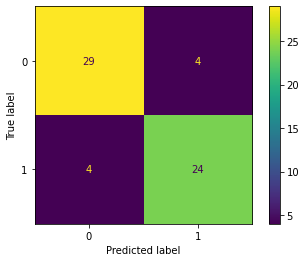

In [125]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(x_test)
mat = confusion_matrix(y_true= (y_test.to_numpy().reshape((61,1))), y_pred=np.around(y_pred))
print("Neural network confusion matrix:")
disp = ConfusionMatrixDisplay(confusion_matrix=mat )
disp.plot()
plt.show()

In [127]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
y_pred = model.predict(x_test)
print('Accuracy: %.3f' % accuracy_score(y_test.to_numpy().reshape((61,1)), np.around(y_pred)))
print('Precision: %.3f' % precision_score(y_test.to_numpy().reshape((61,1)), np.around(y_pred)))
print('Recall: %.3f' % recall_score(y_test.to_numpy().reshape((61,1)), np.around(y_pred)))
print('F1 score: %.3f' % f1_score(y_test.to_numpy().reshape((61,1)), np.around(y_pred)))

2/2 [==============================] - 0s 16ms/step
Accuracy: 0.869
Precision: 0.857
Recall: 0.857
F1 score: 0.857


References
<br>Dataset : https://www.kaggle.com/datasets/zhaoyingzhu/heartcsv?resource=download